Importing All Required Modules

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load the Data from the CSV file

In [6]:
data= pd.read_csv("C:\\Users\\PAVAN\\OneDrive\\Desktop\\Bharat Intern\\Forecasting the sales of a supermarket\\train.csv")
df=pd.DataFrame(data)

In [7]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [8]:
bins = [0,400, 5000, np.inf]
labels = ['small sales', 'medium sales', 'big sales']
sales_groups = pd.cut(df.Sales, bins, labels=labels)
df['sale_group'] = sales_groups
df["customer_rate"] =df.groupby("Customer ID")["Customer ID"].transform('count')
sales = df[df["sale_group"] == "small sales"]
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['month'] = df['Order Date'].dt.to_period('M')
df['month'] = df['month'].astype(str)
df['month'] = pd.to_datetime(df['month'])
df['year'] = df['Order Date'].dt.year
df.drop(['Row ID', 'Postal Code'], axis=1, inplace=True)
df

C:\Users\PAVAN\AppData\Local\Temp\ipykernel_16276\429416547.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])
C:\Users\PAVAN\AppData\Local\Temp\ipykernel_16276\429416547.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,sale_group,customer_rate,month,year
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,small sales,5,2017-08-01,2017
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,medium sales,5,2017-08-01,2017
2,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,small sales,9,2017-12-01,2017
3,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,medium sales,15,2016-11-01,2016
4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,small sales,15,2016-11-01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,small sales,24,2017-05-01,2017
9796,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,small sales,8,2016-12-01,2016
9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,small sales,8,2016-12-01,2016
9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,small sales,8,2016-12-01,2016


# What are the most demanded products?

,Category
Office Supplies,5909
Furniture,2078
Technology,1813


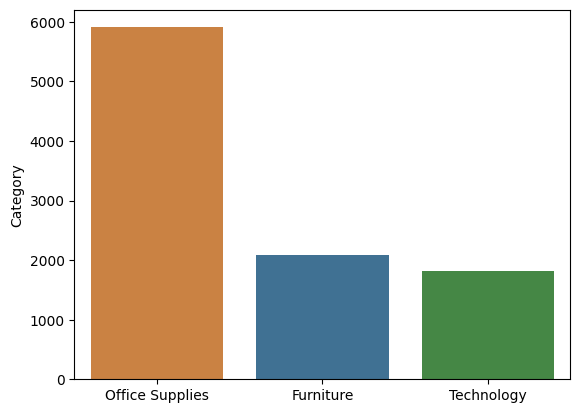

In [9]:
category_count = pd.DataFrame(df["Category"].value_counts())
sns.barplot(category_count, x=category_count.index, y="Category", palette=["#E1812C", "#3274A1", "#3A923A"])
category_count

# How many customer do we have and from which segment?


,Segment
Consumer,409
Corporate,236
Home Office,148


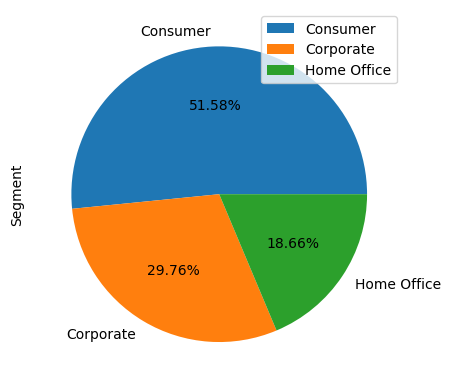

In [10]:
my_customers_df_copy = df.copy()
my_customers_df = my_customers_df_copy.drop_duplicates("Customer ID", keep="first")
my_customers = pd.DataFrame(my_customers_df["Segment"].value_counts())
my_customers.plot.pie(y='Segment',autopct="%.2f%%")
my_customers

Since most of our customers are consumers then we need to attract Corporate and Home Office to increase expensive products sales¶


# Are my sales increasing over the years?

<AxesSubplot: xlabel='month', ylabel='Sales'>

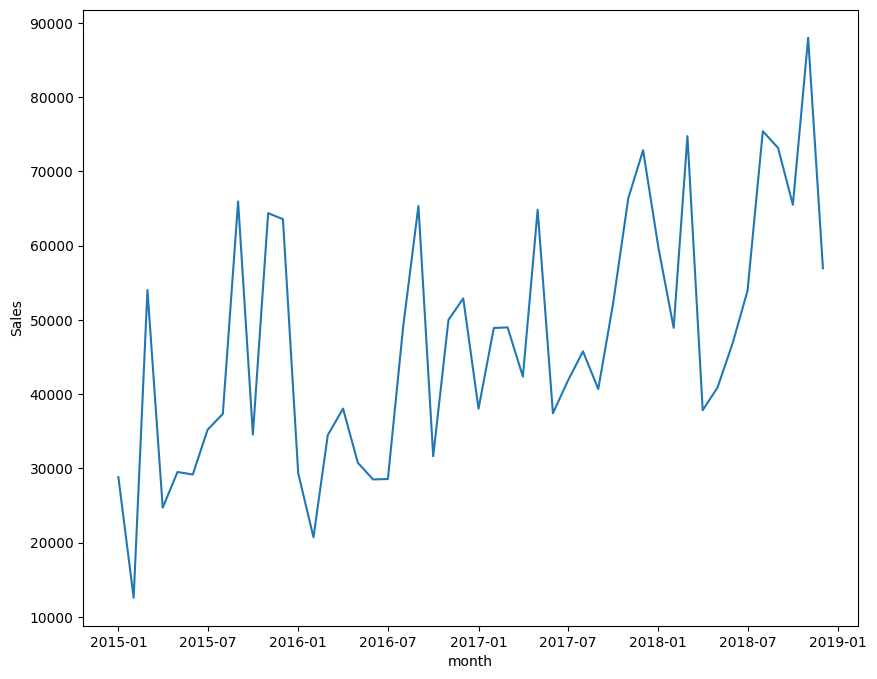

In [11]:
monthly_sales = pd.DataFrame(df.groupby('month')["Sales"].sum())
monthly_sales = monthly_sales.reset_index()
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(monthly_sales, x='month', y='Sales')

As we can notice that our sales are increasing over the years
We can also notice that there is always a spike of sales in November, this may be because the black friday or customers tend to buy at this period of the year which is the reason for the black friday
The spikes in September probably because it's the start of new school year

## The spikes in march are because of the following orders

In [12]:
march = df[(df['Order Date'].dt.month == 3) & (df['sale_group'] == "big sales")]
march

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,sale_group,customer_rate,month,year
509,CA-2016-145352,2016-03-16,2016-03-22,Standard Class,CM-12385,Christopher Martinez,Consumer,United States,Atlanta,Georgia,South,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.95,big sales,10,2016-03-01,2016
2697,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,big sales,15,2015-03-01,2015
8153,CA-2018-140151,2018-03-23,2018-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,big sales,18,2018-03-01,2018


The reason for this may be due to the start of new fiscal year
which means we can make offers on expensive products like these to encourage customers to buy them

## What about the products that are above 400 and less than 5000 in march?¶


<AxesSubplot: ylabel='Category'>

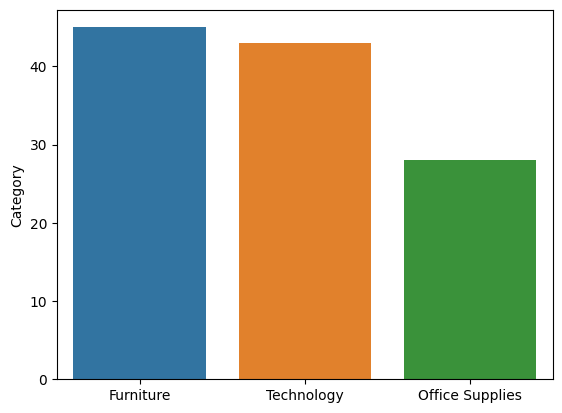

In [13]:
march = df[(df['Order Date'].dt.month == 3) & (df['sale_group'] == "medium sales")]
march_count = pd.DataFrame(march["Category"].value_counts())
sns.barplot(march_count, x=march_count.index, y='Category')

It looks like that people are buying furniture mostly at this month
This may be due to the begining of the spring and people are buying home improvement products
We can make offers on furniture on this month to encourage people to purchase them

# Do we maintain our customers?
## What is their rate and the category they come for?

<AxesSubplot: xlabel='customer_rate', ylabel='Sales'>

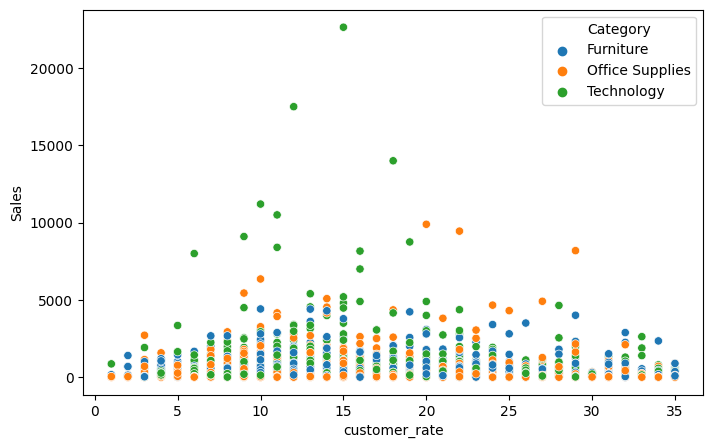

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(df,x="customer_rate", y="Sales", hue="Category")

This graph show that our customers are satisfied with out products as they order products again a number reach 35 order.
Most of our sales come from cheap products.
The sold Expensive products mostly come from technology.
The customer who buy expensive products are customers who bough from us many times before.

# How much I'm making from each category?¶


,Sales
Category,
Furniture,728658.5757
Office Supplies,705422.3340
Technology,827455.8730


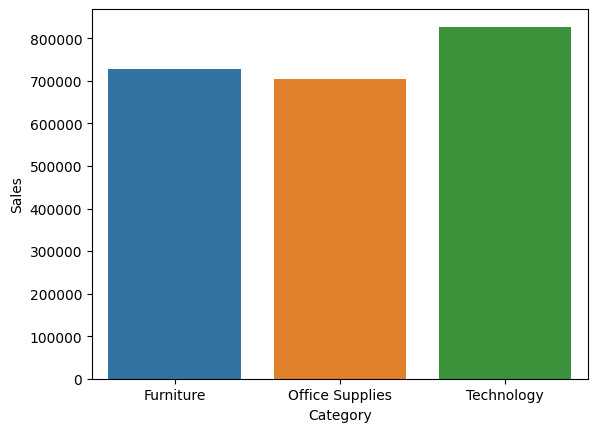

In [15]:
category_money = pd.DataFrame(df.groupby("Category")["Sales"].sum())
sns.barplot(data=category_money, x=category_money.index, y=category_money["Sales"])
category_money

## Do I have new customers?
## Where these customers come from?

<AxesSubplot: xlabel='year', ylabel='New Customers'>

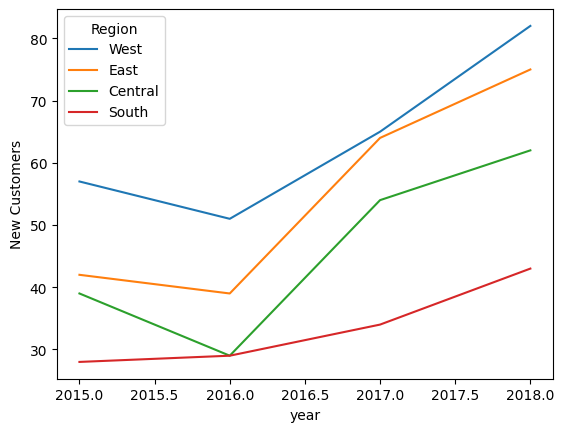

In [16]:
my_customers = pd.DataFrame(my_customers_df.groupby('year')["Region"].value_counts())
my_customers.rename(columns={'Region': 'New Customers'}, inplace=True)
my_customers = my_customers.reset_index()
sns.lineplot(my_customers, x='year', y='New Customers', hue='Region')

New customers are increasing over the years.
The number of new customers from south are very low.
There wasn't much customers at the first year from the south region.
The number of new customers was very low in the 2016.

### We can make commertial in South to attract more cutomers

,State
Florida,46
Virginia,39
North Carolina,32
Kentucky,25
Georgia,25


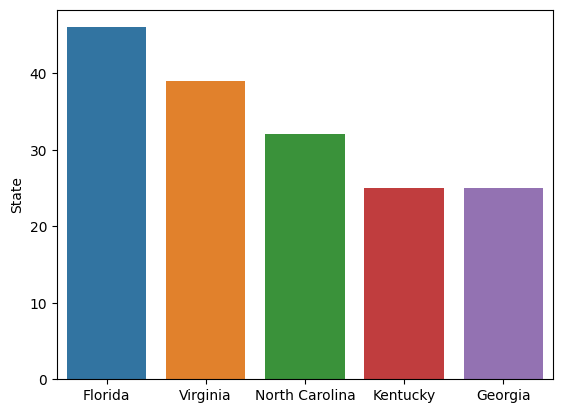

In [17]:
south_df = df[(df["Region"] == "South") & (df["sale_group"].isin(["medium sales"]))]
south_states = pd.DataFrame(south_df["State"].value_counts())[:5]
sns.barplot(south_states, x=south_states.index, y="State")
south_states 


<AxesSubplot: ylabel='sale_group'>

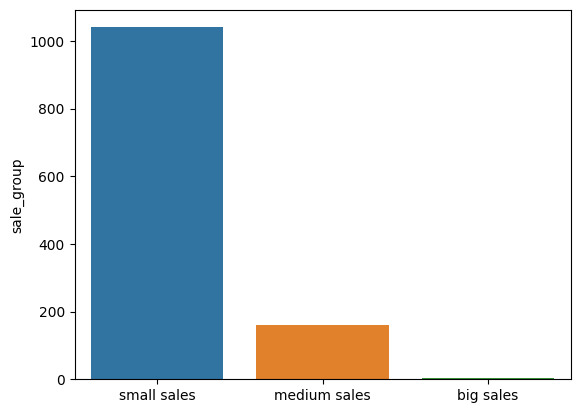

In [18]:
states_df = df[df["State"].isin(["Florida", "North Carolina", "Virginia", "Tennessee", "Georgia"])]
states_category = pd.DataFrame(states_df["sale_group"].value_counts())
sns.barplot(states_category, x=states_category.index, y="sale_group")

## This can show us that people in the most active states order cheap products mostly
## My be the economy in this region is lower than the others

<AxesSubplot: ylabel='Ship Mode'>

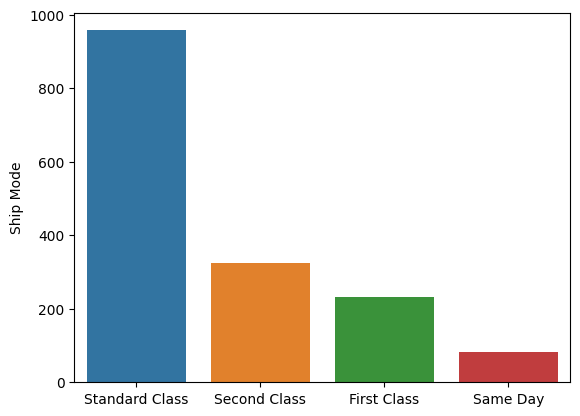

In [19]:
south_df = df[(df["Region"] == "South")]
south_shipmode = pd.DataFrame(south_df["Ship Mode"].value_counts())
sns.barplot(south_shipmode, x=south_shipmode.index, y='Ship Mode')
# south_df

### Conlusion:
The Office Supplies are the most demanded products for sure, these products are used frequently and they attract our customers to buy products with more money from other categories with much more money.


My sales are low in South, I need to make some commercials at this region
Most of my sales and frequent customers comes from consumers segment and I don't have much frequent customers from other segments.


Our sales are increasing over the years.

We don't have alot of customers, even though we are making a lot of sales.

Number of new customers are increasing in all regions, but it's increasing very slowly in the south and we didn't start with large number of customers there.